<a href="https://colab.research.google.com/github/preston-cell/vhs-intro-ai/blob/main/Coding_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Class distribution: {0: 6903, 1: 7877, 2: 6990, 3: 7141, 4: 6824, 5: 6313, 6: 6876, 7: 7293, 8: 6825, 9: 6958}


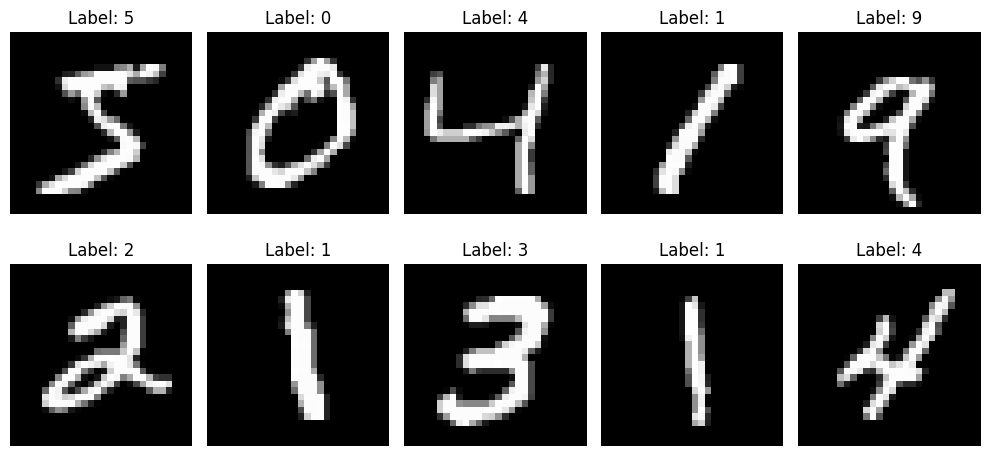

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import models, layers, regularizers
from tensorflow.keras.optimizers import Adam


# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Flatten the data for preprocessing (28x28 images become 1D vectors)
x_train = x_train.reshape(-1, 28 * 28)
x_test = x_test.reshape(-1, 28 * 28)

# Combine the data for exploration
X = np.concatenate([x_train, x_test])
y = np.concatenate([y_train, y_test])

# explore the data
unique, counts = np.unique(y, return_counts=True)
print(f"Class distribution: {dict(zip(unique, counts))}")

# visualize some examples
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X[i].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {y[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

From what we can tell, the data is numbers in some hand writing. The model that we have to create would be to predict what number it is. The distribution of classes seems to be balanced so there is no bias towards any specific number

In [21]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, stratify=y, train_size=0.8, random_state=42)

print(f"Training set shape: {X_train.shape}")
print(f"Validation set shape: {X_valid.shape}")


Training set shape: (56000, 784)
Validation set shape: (14000, 784)


Here I split the dataset into training, validation, and test sets

In [22]:
# Normalize the data
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)

I normalize the data using the StandardScaler. This is a good practice in general, and will allow faster and more stable training.

Ill start with a baseline model with two layers and the ReLu activation function. There will be 128 in the first and 10 in the output with the softmax activation for a binary classification. I will train for 10 epochs with a batch size of 32.

In [23]:
from tensorflow import keras
from tensorflow.keras import layers

input_shape = [X_train.shape[1]]  # Input shape: 784 (28x28 flattened)

model1 = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=input_shape),
    layers.Dense(10, activation='softmax')  # Output layer for 10 classes
])

model1.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_26 (Dense)                     │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

I will use the optimizer, loss, and metric described in the Kaggle notebook for binary classification.

In [24]:
model1.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

history_adam = model1.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    epochs=10,
    batch_size=32
)


Epoch 1/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8892 - loss: 0.3795 - val_accuracy: 0.9566 - val_loss: 0.2097
Epoch 2/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9683 - loss: 0.1087 - val_accuracy: 0.9639 - val_loss: 0.2368
Epoch 3/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9786 - loss: 0.0693 - val_accuracy: 0.9678 - val_loss: 0.3405
Epoch 4/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9849 - loss: 0.0531 - val_accuracy: 0.9694 - val_loss: 0.4127
Epoch 5/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9892 - loss: 0.0341 - val_accuracy: 0.9690 - val_loss: 0.4087
Epoch 6/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9901 - loss: 0.0308 - val_accuracy: 0.9707 - val_loss: 0.4229
Epoch 7/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9925 - loss: 0.0228 - val_accuracy: 0.9724 - val_loss: 0.4547
Epoch 8/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9932 - loss: 0.022

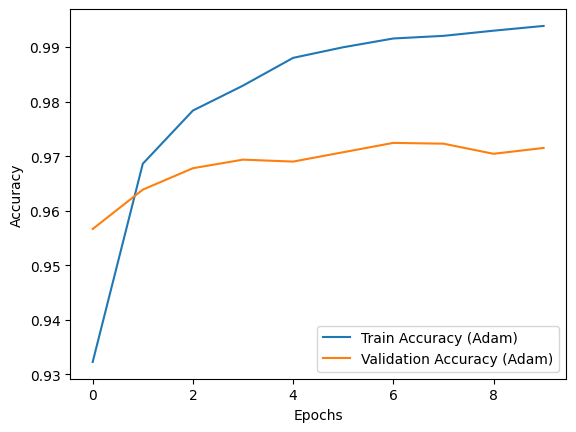

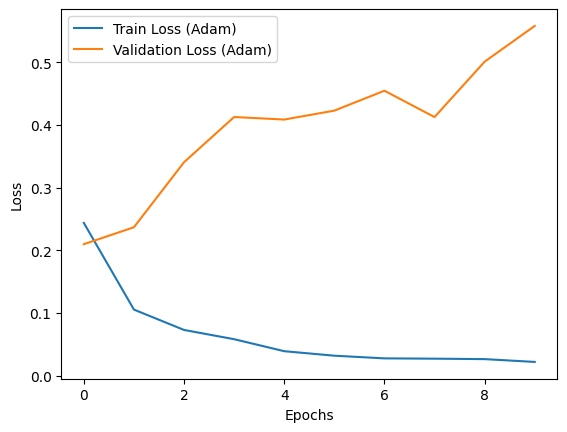

In [25]:
# Plot training and validation accuracy
plt.plot(history_adam.history['accuracy'], label='Train Accuracy (Adam)')
plt.plot(history_adam.history['val_accuracy'], label='Validation Accuracy (Adam)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history_adam.history['loss'], label='Train Loss (Adam)')
plt.plot(history_adam.history['val_loss'], label='Validation Loss (Adam)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


I notice that the validation loss spiked excessively while the training loss decreased. So this is a clear overfitting case, with the validation accuracy lower than the training accuracy. So there is underfitting and overfitting.

My next step will be to increase the capacity to access the underfitting, and see what happens

In [26]:
model2 = keras.Sequential([
    layers.BatchNormalization(input_shape=input_shape),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(10, activation='softmax')
])

model2.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/normalization/batch_normalization.py:143: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ batch_normalization_24               │ (None, 784)                 │           3,136 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_25               │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_26               │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 239,818 (936.79 KB)

 Trainable params: 237,482 (927.66 KB)

 Non-trainable params: 2,336 (9.12 KB)

In [27]:
model2.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

history_adam = model2.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    epochs=10,
    batch_size=32
)


Epoch 1/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.8704 - loss: 0.4208 - val_accuracy: 0.9522 - val_loss: 0.4127
Epoch 2/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9506 - loss: 0.1599 - val_accuracy: 0.9636 - val_loss: 3.1608
Epoch 3/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9610 - loss: 0.1245 - val_accuracy: 0.9704 - val_loss: 4.5433
Epoch 4/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9675 - loss: 0.1036 - val_accuracy: 0.9716 - val_loss: 3.2753
Epoch 5/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9703 - loss: 0.0925 - val_accuracy: 0.9712 - val_loss: 1.0986
Epoch 6/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9742 - loss: 0.0795 - val_accuracy: 0.9712 - val_loss: 4.0490
Epoch 7/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9760 - loss: 0.0743 - val_accuracy: 0.9743 - val_loss: 4.4016
Epoch 8/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.9788 - loss: 0

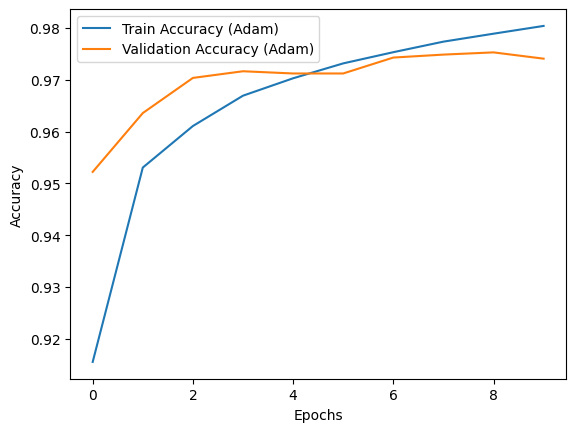

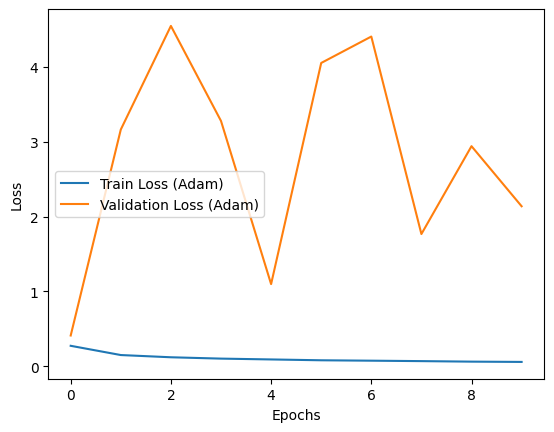

In [28]:
# Plot training and validation accuracy
plt.plot(history_adam.history['accuracy'], label='Train Accuracy (Adam)')
plt.plot(history_adam.history['val_accuracy'], label='Validation Accuracy (Adam)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history_adam.history['loss'], label='Train Loss (Adam)')
plt.plot(history_adam.history['val_loss'], label='Validation Loss (Adam)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

After increasing capacity, the underfitting is no longer an issue. The validation accuracy runs around the same as the training accuracy. However, the model is overfitting alot now as seen by the training versus validation loss. To counteract this, I will implement
 batch normalization.

In [29]:
from tensorflow.keras.callbacks import EarlyStopping

# Define EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=3,          # Stop after 3 epochs with no improvement
    restore_best_weights=True  # Restore the best weights at the end
)

# Train the model with early stopping
history = model2.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    epochs=50,  # Use a large number of epochs
    batch_size=32,
    callbacks=[early_stopping]
)

Epoch 1/50
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9821 - loss: 0.0551 - val_accuracy: 0.9740 - val_loss: 1.2212
Epoch 2/50
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.9844 - loss: 0.0489 - val_accuracy: 0.9768 - val_loss: 0.8433
Epoch 3/50
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.9824 - loss: 0.0511 - val_accuracy: 0.9750 - val_loss: 6.4493
Epoch 4/50
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.9849 - loss: 0.0437 - val_accuracy: 0.9754 - val_loss: 1.6876
Epoch 5/50
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9854 - loss: 0.0437 - val_accuracy: 0.9751 - val_loss: 8.4790


438/438 - 1s - 2ms/step - accuracy: 0.9768 - loss: 0.8433
Validation Accuracy: 0.98


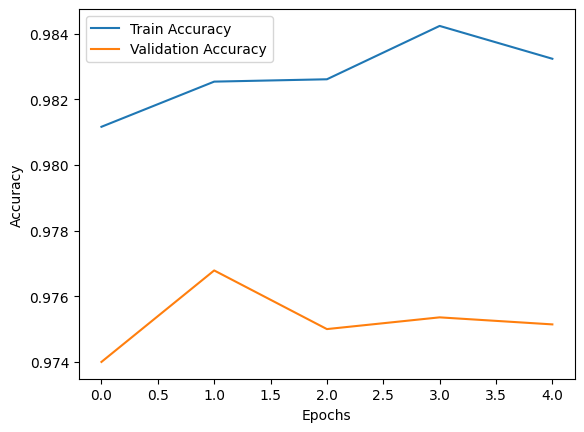

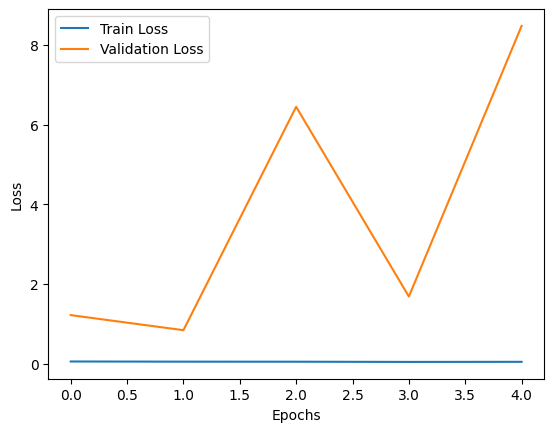

In [30]:
test_loss, test_accuracy = model2.evaluate(X_valid, y_valid, verbose=2)
print(f"Validation Accuracy: {test_accuracy:.2f}")

# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

This decision was bad in all sorts of ways. The model is severely underfitting while severely overfitting. We will have to backtrack and begin from where we started.

I am going to be reducing the capacity of the model slightly, while adding a dropout to access the overfitting. I am going to play around with the hyperparameters as well. Ill do a lower learning rate, allowing the model to converge on a value for a longer amount of time. Ill also change the batch size to 64 to counteract the slow learning rate, so it is sort of balanced in a way.

Epoch 1/50
875/875 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6062 - loss: 1.2681 - val_accuracy: 0.9106 - val_loss: 0.4812
Epoch 2/50
875/875 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.8706 - loss: 0.4289 - val_accuracy: 0.9289 - val_loss: 0.3872
Epoch 3/50
875/875 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9010 - loss: 0.3293 - val_accuracy: 0.9407 - val_loss: 1.0116
Epoch 4/50
875/875 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9164 - loss: 0.2796 - val_accuracy: 0.9481 - val_loss: 0.8167
Epoch 5/50
875/875 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9263 - loss: 0.2451 - val_accuracy: 0.9535 - val_loss: 0.5525
Epoch 6/50
875/875 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9322 - loss: 0.2223 - val_accuracy: 0.9560 - val_loss: 0.3692
Epoch 7/50
875/875 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.9416 - loss: 0.1958 - val_accuracy: 0.9614 - val_loss: 0.3539
Epoch 8/50
875/875 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9442 - loss: 0.1838 - val_accuracy:

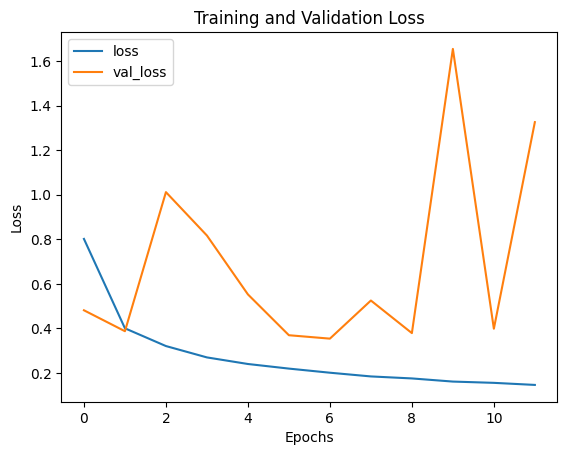

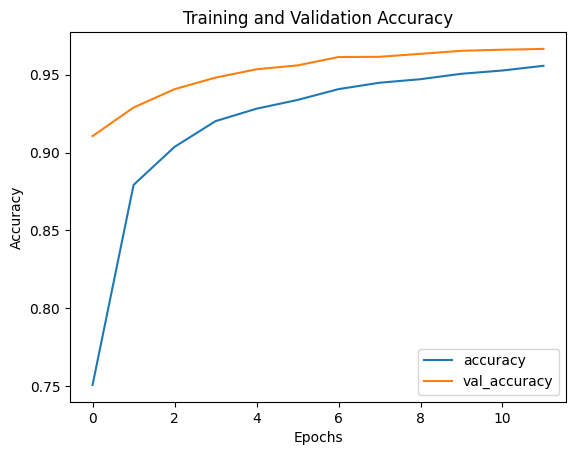

In [32]:
model_updated = keras.Sequential([
    layers.BatchNormalization(),  # Normalize inputs
    layers.Dense(128, activation='relu', input_shape=input_shape),  # First Dense Layer
    layers.BatchNormalization(),
    layers.Dropout(0.4),  # Dropout for regularization

    layers.Dense(64, activation='relu'),  # Second Dense Layer (reduced complexity)
    layers.BatchNormalization(),
    layers.Dropout(0.4),  # Dropout for regularization

    layers.Dense(10, activation='softmax')  # Output layer for 10 classes
])

# Compile the model with a smaller learning rate
model_updated.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.0003),  #Smaller learning rate
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Early Stopping Callback
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

# Train the model
history_updated = model_updated.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=64,  #  increased batch size to batch the smaller learning rate
    epochs=50,  # train for longer because of early stopping
    callbacks=[early_stopping]
)

history_df = pd.DataFrame(history_updated.history)

# Plot training and validation loss
history_df[['loss', 'val_loss']].plot(title='Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# Plot training and validation accuracy
history_df[['accuracy', 'val_accuracy']].plot(title='Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()


This model seems to be performing a bit better than the ones prior. It does well, then spikes in loss, does well, then spikes again. The training and validation accuracy seem to be fine. Although this is improvement, maybe we have to visualize what the model is getting wrong in order to understand the strange pattern in validation loss.

438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


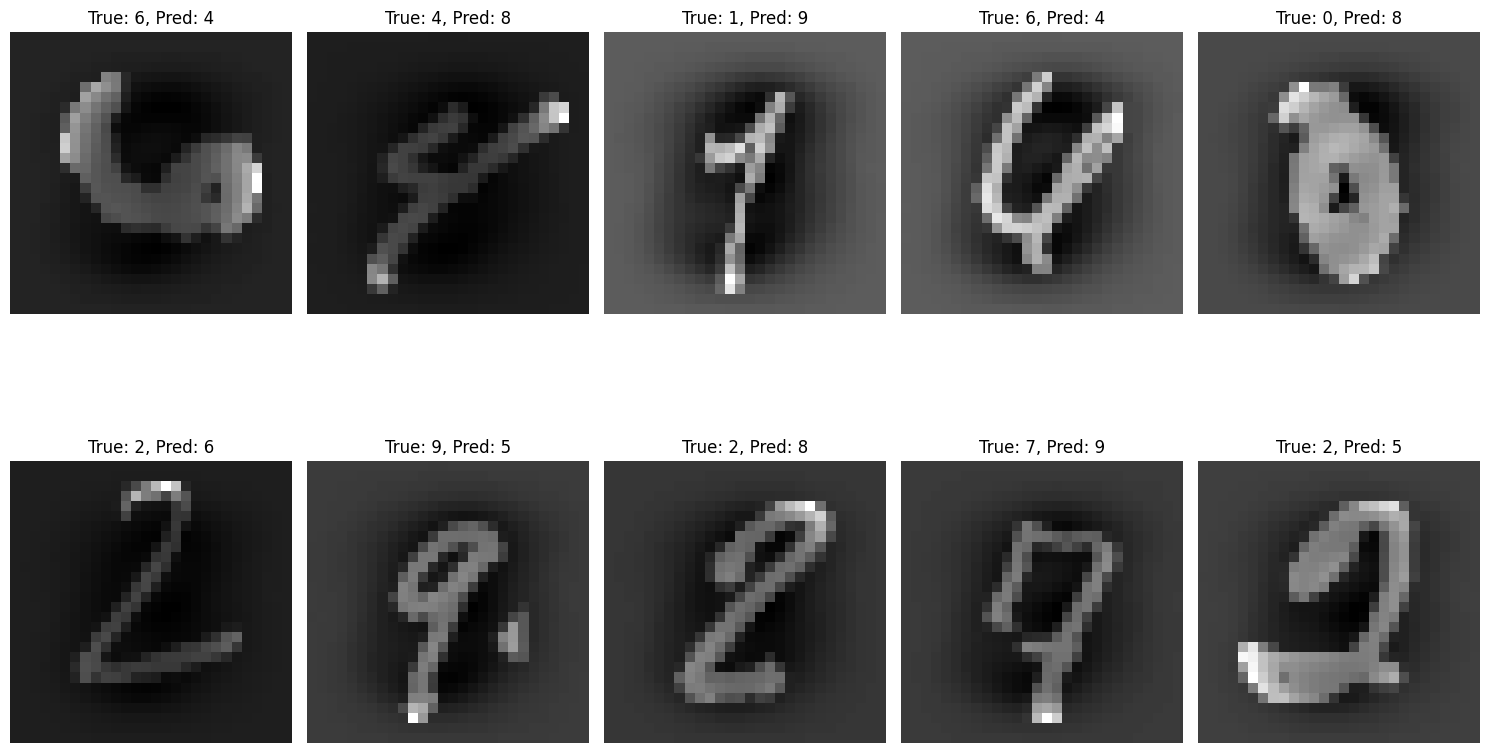

Total incorrect predictions: 541


In [33]:
import numpy as np
import matplotlib.pyplot as plt

# Make predictions on the validation set
y_pred = np.argmax(model_updated.predict(X_valid), axis=1)  # Convert probabilities to class labels

# Find incorrect predictions
incorrect_indices = np.where(y_pred != y_valid)[0]

# displaying at least 10 incorrect predictions
plt.figure(figsize=(15, 10))
for i, idx in enumerate(incorrect_indices[:10]):  # these would be the first 10 incorrect predictions
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_valid[idx].reshape(28, 28), cmap='gray')
    plt.title(f"True: {y_valid[idx]}, Pred: {y_pred[idx]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

# the total amount that the model got wrong
print(f"Total incorrect predictions: {len(incorrect_indices)}")


What I notice about these digits are that they have handwriting that make them resemble other digits. ( 6 vs. 4, 5vs. 6). This is likely why the model keeps getting them wrong. The misclassified digits show some overlapping or incompleted strokes, for example, the 5 predicted as a 7. The model likely struggles to find these subtle details. Some of the digits are also blurred, so it requires better regularization to make conspiracies based on these digits.

Based on this analysis, I can try to reduce the capcity. This way, the model will learn generalizable patterns rather than memorizing the training data. I will increase the dropout to force the model to rely on multiple neurons for decision making. Ill add additional nbatch normalization to help stabilize the training, this might be the most important part considering the blurry images and the spikes in validation loss. Ill also make the learning rate even lower and the batch size slightly larger to force the model to be more precise and notice those subtle details in the digits.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.4128 - loss: 1.9366 - val_accuracy: 0.8754 - val_loss: 0.5547
Epoch 2/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.7811 - loss: 0.7140 - val_accuracy: 0.9026 - val_loss: 0.4926
Epoch 3/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.8400 - loss: 0.5340 - val_accuracy: 0.9140 - val_loss: 0.3720
Epoch 4/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8640 - loss: 0.4578 - val_accuracy: 0.9230 - val_loss: 0.4506
Epoch 5/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8849 - loss: 0.3993 - val_accuracy: 0.9296 - val_loss: 0.3750
Epoch 6/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.8922 - loss: 0.3681 - val_accuracy: 0.9334 - val_loss: 0.3103
Epoch 7/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8991 - loss: 0.3416 - val_accuracy: 0.9374 - val_loss: 0.3839
Epoch 8/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9059 - loss: 0.3189 - val_accuracy:

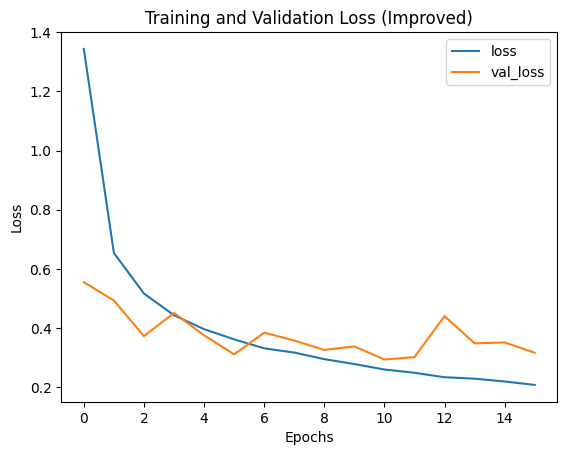

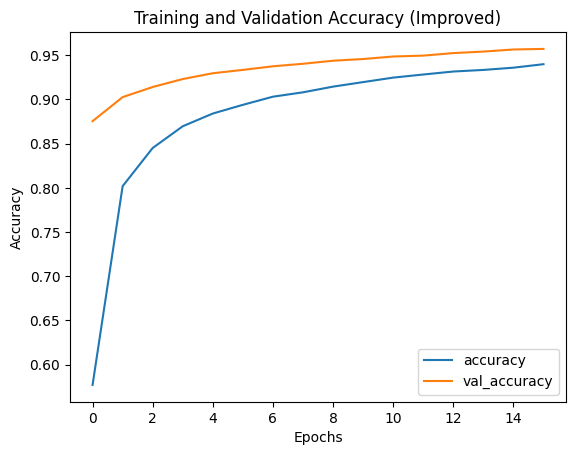

In [34]:
model_improved = keras.Sequential([
    layers.BatchNormalization(),
    layers.Dense(128, activation='relu', input_shape=input_shape),
    layers.BatchNormalization(),
    layers.Dropout(0.5),  # increased dropout

    layers.Dense(64, activation='relu'),  # second layer with reduced capacity
    layers.BatchNormalization(),
    layers.Dropout(0.5),  # increased dropout

    layers.Dense(10, activation='softmax')
])

# Compile the model
model_improved.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.0002),  # further reduced learning rate
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Early Stopping Callback
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

history_improved = model_improved.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=128,  # even learger batch size for learning rate
    epochs=50,  # allowing for early stopping
    callbacks=[early_stopping]
)

# Plot training and validation metrics
import pandas as pd
import matplotlib.pyplot as plt

history_df = pd.DataFrame(history_improved.history)

# Loss plot
history_df[['loss', 'val_loss']].plot(title='Training and Validation Loss (Improved)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# Accuracy plot
history_df[['accuracy', 'val_accuracy']].plot(title='Training and Validation Accuracy (Improved)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()


The resulting model has much less overfitting, with a validation accuracy that is acceptable. The edits above seemed to have stabilized the training, and allowed it to learn more generalizable patterns.

So by addressing the specific issues of the data, this final model was able to correctly classify a higher proportion of examples while having a stable training. I would consider this model a success in terms of minimizing noise, calass overlap, and ambiguity in hand writing that were very challenging for the first few models.
